In [1]:
import matplotlib.pyplot as pltimport
import xhermes as xh
from boutdata.data import BoutData
from boutdata import collect
import matplotlib.pyplot as plt
import glob     
import re
import numpy as np
import pandas as pd
from heatflux_functions import *
from data_accessors import *
import xarray as xr
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import sys,os

sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/sdtools"))

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from hermes3.fluxes import *



plt.style.use('ggplot')
plt.rcParams.update({'font.size': 10})
linewidth = 3
markersize = 15



# plt.style.use('ggplot')
plt.style.use('default')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 16})


def replace_guards(var):
    """
	This in-place replaces the points in the guard cells with the points on the boundary
    
    """
    # Strip the edge guard cells
    var = var[1:-1]

    var[0] = 0.5*(var[0] + var[1])
    var[-1] = 0.5*(var[-1] + var[-2])
    return var

In [2]:
ds = pd.read_pickle('/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/flux_limit/Flux_limiter_detachment_ITER_final.pickle')

colors = {
    'SH': '#E24A33',
    '0.2': '#348ABD',
    '0.1': '#988ED5',
    '0.06': 'grey',
    '0.3': '#777777',
    '0.4': '#FBC15E',
    'SNB': 'magenta'
}

# load more snb

In [3]:
snb0012 = xh.open(
    '/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/updated_flux_limitation/2024-03-25_wigram_reference_glover_comparison_FINAL/alpha_snb/neon_0.012').isel(t=-1)
snb0014 = xh.open(
    '/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/updated_flux_limitation/2024-03-25_wigram_reference_glover_comparison_FINAL/alpha_snb/neon_0.014').isel(t=-1)
snb0016 = xh.open(
    '/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/updated_flux_limitation/2024-03-25_wigram_reference_glover_comparison_FINAL/alpha_snb/neon_0.016').isel(t=-1)
snb0018 = xh.open(
    '/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/updated_flux_limitation/2024-03-25_wigram_reference_glover_comparison_FINAL/alpha_snb/neon_0.018').isel(t=-1)


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tu

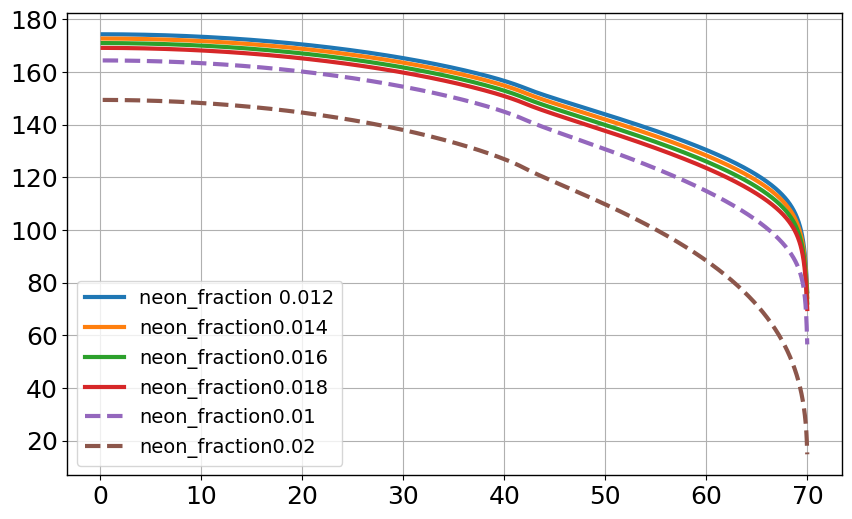

In [10]:
# snb0012['Te'].plot(label='0.012', linewidth=linewidth)

# snb0014['Te'].plot(label='0.014', linewidth=linewidth)


# snb0016['Te'].plot(label='0.016', linewidth=linewidth)

# snb0018['Te'].plot(label='0.018', linewidth=linewidth)

ds_001 = ds[(ds['alpha'] == 'SNB') & (ds['neon_frac'] == 0.01)]
ds_002 = ds[(ds['alpha'] == 'SNB') & (ds['neon_frac'] == 0.02)]


Te0012 = replace_guards(np.ravel(snb0012['Te'].values))

Te0014 = replace_guards(np.ravel(snb0014['Te'].values))

Te0016 = replace_guards(np.ravel(snb0016['Te'].values))

Te0018 = replace_guards(np.ravel(snb0018['Te'].values))

x = snb0012['y'][1:-1]

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(x, Te0012, label='neon_fraction 0.012', linewidth=linewidth)
ax.plot(x, Te0014, label='neon_fraction0.014', linewidth=linewidth)
ax.plot(x, Te0016, label='neon_fraction0.016', linewidth=linewidth)
ax.plot(x, Te0018, label='neon_fraction0.018', linewidth=linewidth)
ax.plot(x, ds_001['Te'].values, label='neon_fraction0.01', linewidth=linewidth, linestyle='--')
ax.plot(x, ds_002['Te'].values, label='neon_fraction0.02', linewidth=linewidth, linestyle='--')
ax.legend()


# Profiles

SH
0.06
0.2
SNB


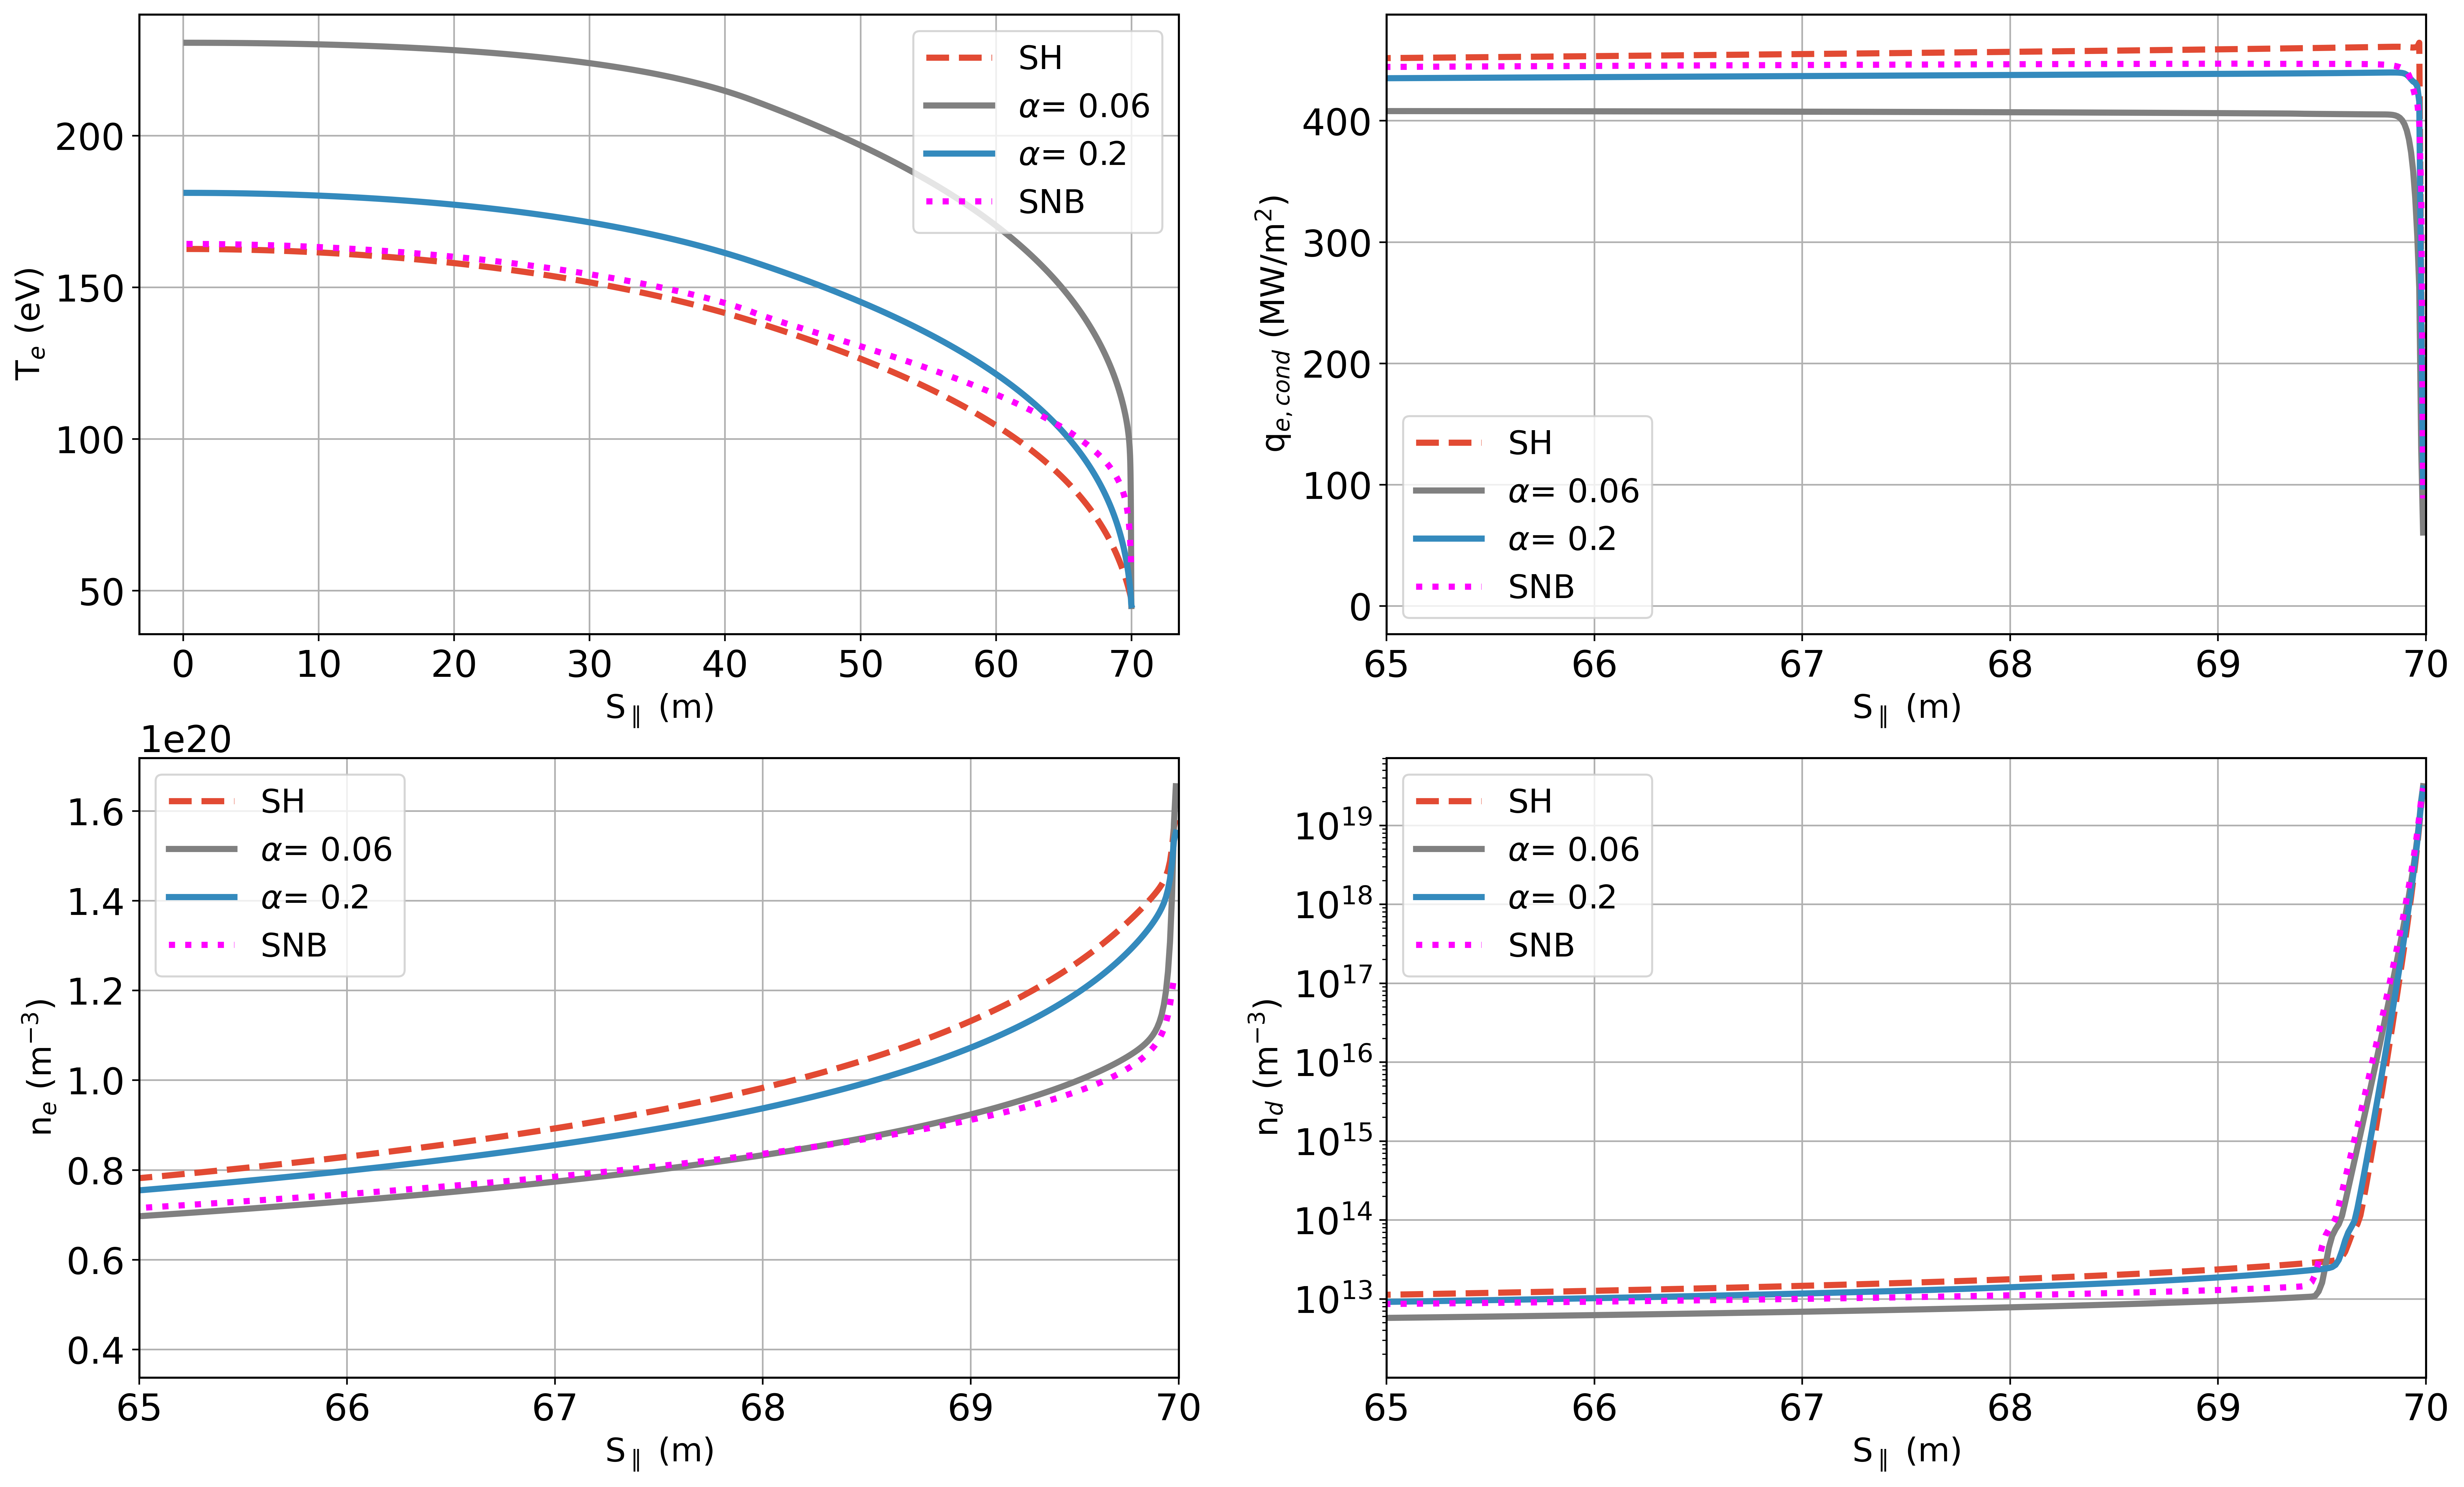

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12), dpi=500)
# ax_inset[0] = inset_axes(ax, width="30%", height="30%", loc='lower left',bbox_to_anchor=(0.2, 0.2, 1, 1), bbox_transform=fig.transFigure)

neon_0_ds = ds[ds['neon_frac'] == 0.0]

for i in neon_0_ds['alpha'].unique():
    ds_i = ds[(ds['alpha'] == i) & (ds['neon_frac'] == 0.01)]
    
    if i not in ['0.1', '0.4']:  # Exclude plotting for alpha = 'SNB'
        print(i)
        if i == 'SH':
            linestyle = '--'
            q = spitzer_q_electron_simple(ds_i) * 1e-8
            label = 'SH'
        elif i == 'SNB':
            linestyle = ':'
            q = divq_integrate(ds_i, snb_int=True) * 1e-6
            label = 'SNB'
        else:
            linestyle = '-'
            q = spitzer_q_electron_simple(ds_i)* 1e-8
            label = r'$\alpha$' + f'= {i}'

        ax[0,0].plot(ds_i['y'], ds_i['Te'],
                   label=label, linewidth=linewidth, markersize=markersize, color=colors[i], linestyle=linestyle)
        
        ax[0,1].plot(ds_i['y'], q,
            label=label, linewidth=linewidth, markersize=markersize, color=colors[i], linestyle=linestyle)
        
        ax[1,0].plot(ds_i['y'], ds_i['Ne'],
                   label=label, linewidth=linewidth, markersize=markersize, color=colors[i], linestyle=linestyle)
        
        
        ax[1,1].plot(ds_i['y'], ds_i['Nd'], label=label, linewidth=linewidth, markersize=markersize, color=colors[i], linestyle=linestyle)

ax[0,0].set_xlabel(r'S$_\parallel$ (m)')
ax[0,0].set_ylabel(r'T$_e$ (eV)')
# ax[0,0].set_xbound(65,70.0001)
ax[0,0].legend(loc='upper right')

ax[0,1].set_xlabel(r'S$_\parallel$ (m)')
ax[0,1].set_ylabel(r'q$_{e,cond}$ (MW/m$^2$)')
ax[0,1].set_xbound(35,70.0001)
ax[0,1].set_xbound(65,70.0001)
# ax[2].set_ybound(0, 0.1e11)
ax[0,1].legend( loc='lower left')

ax[1,0].set_xlabel(r'S$_\parallel$ (m)')
ax[1,0].set_ylabel(r'n$_e$ (m$^{-3}$)')
# ax[1,0].set_yscale('log')
ax[1,0].set_xbound(65,70.0001)
ax[1,0].legend( loc='upper left')

ax[1,1].set_xlabel(r'S$_\parallel$ (m)')
ax[1,1].set_ylabel(r'n$_d$ (m$^{-3}$)')
ax[1,1].set_yscale('log')
ax[1,1].set_xbound(65,70.0001)
ax[1,1].legend(loc='upper left')

plt.show()



# RNeon

SH
0.06
0.2
SNB


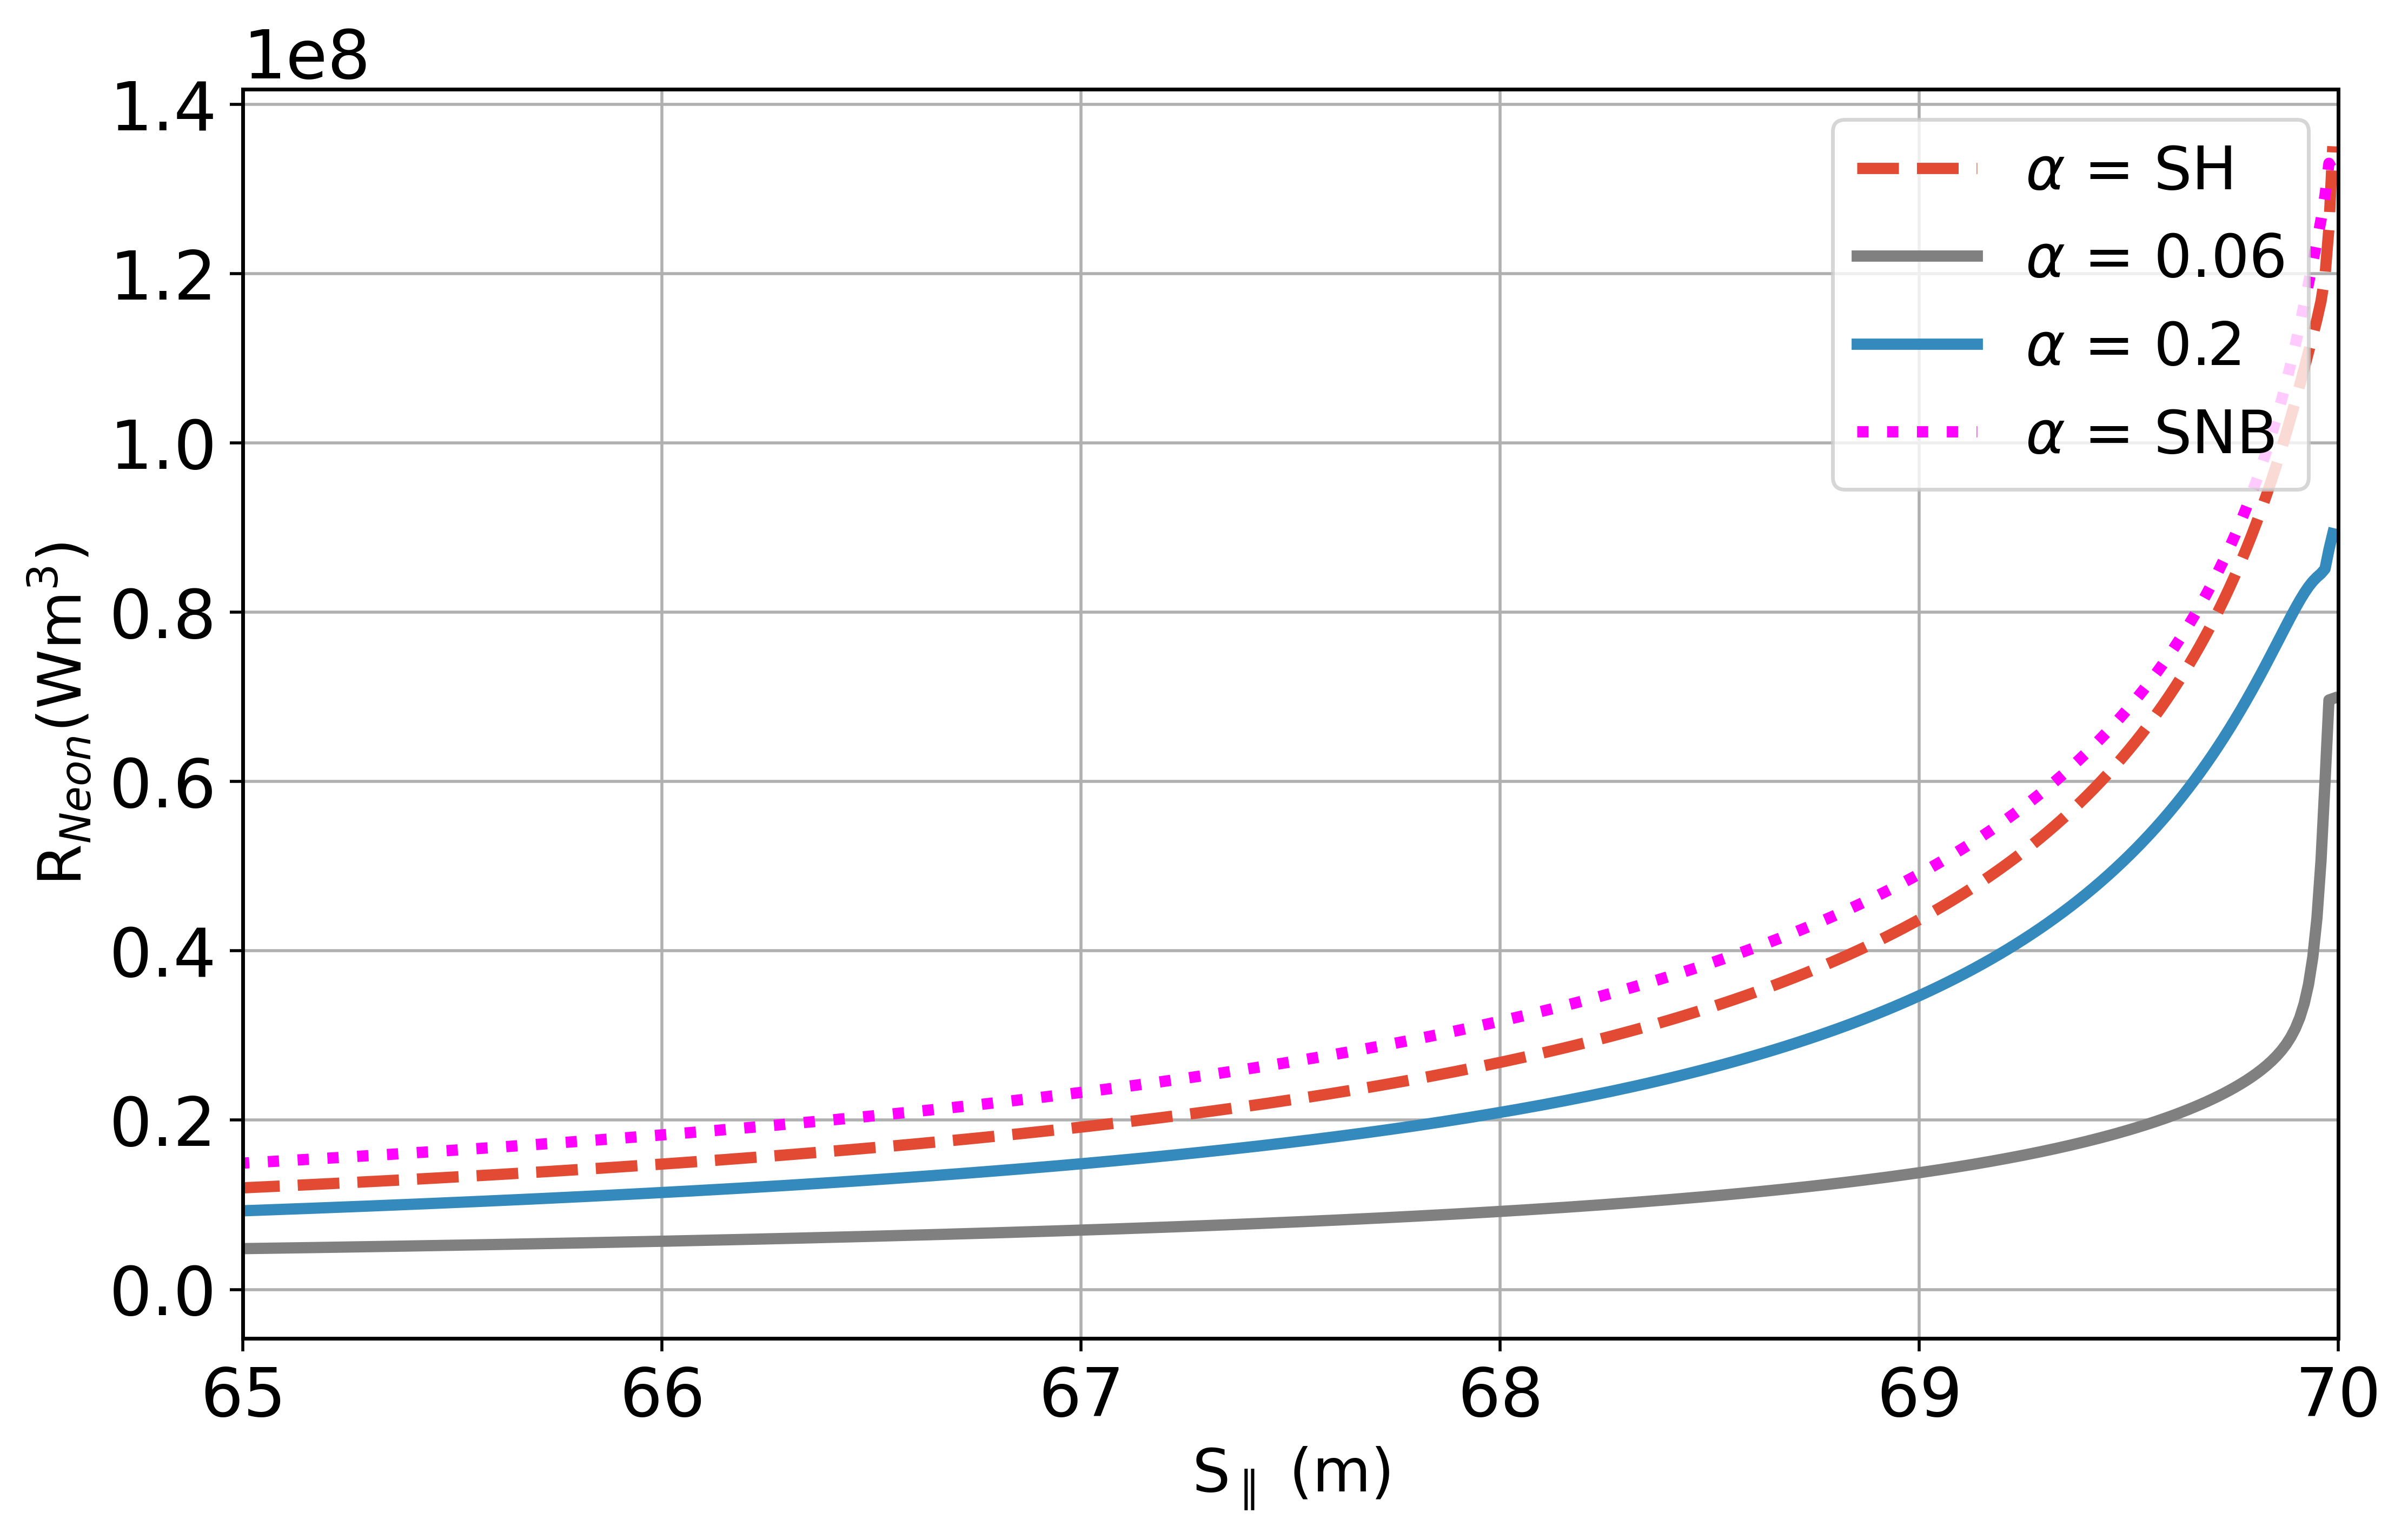

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=500)
# ax_inset[0] = inset_axes(ax, width="30%", height="30%", loc='lower left',bbox_to_anchor=(0.2, 0.2, 1, 1), bbox_transform=fig.transFigure)

neon_0_ds = ds[ds['neon_frac'] == 0.0]

for i in neon_0_ds['alpha'].unique():
    ds_i = ds[(ds['alpha'] == i) & (ds['neon_frac'] == 0.04)]
    
    if i not in ['0.1', '0.4']:  # Exclude plotting for alpha = 'SNB'
        print(i)
        if i == 'SH':
            linestyle = '--'
            q = spitzer_q_electron_simple(ds_i) * 1e-8
        elif i == 'SNB':
            linestyle = ':'
            q = divq_integrate(ds_i, snb_int=True) * 1e-6
        else:
            linestyle = '-'
            q = spitzer_q_electron_simple(ds_i)* 1e-8

        ax.plot(ds_i['y'], ds_i['Rneon'],
                   label=r'$\alpha$' + f' = {i}', linewidth=linewidth, markersize=markersize, color=colors[i], linestyle=linestyle)


ax.set_xlabel(r'S$_\parallel$ (m)')
ax.set_ylabel(r'R$_{Neon}$(Wm$^3$)')
ax.set_xbound(65,70.0001)
ax.legend(loc='upper right')


# Target temp vs neon fraction

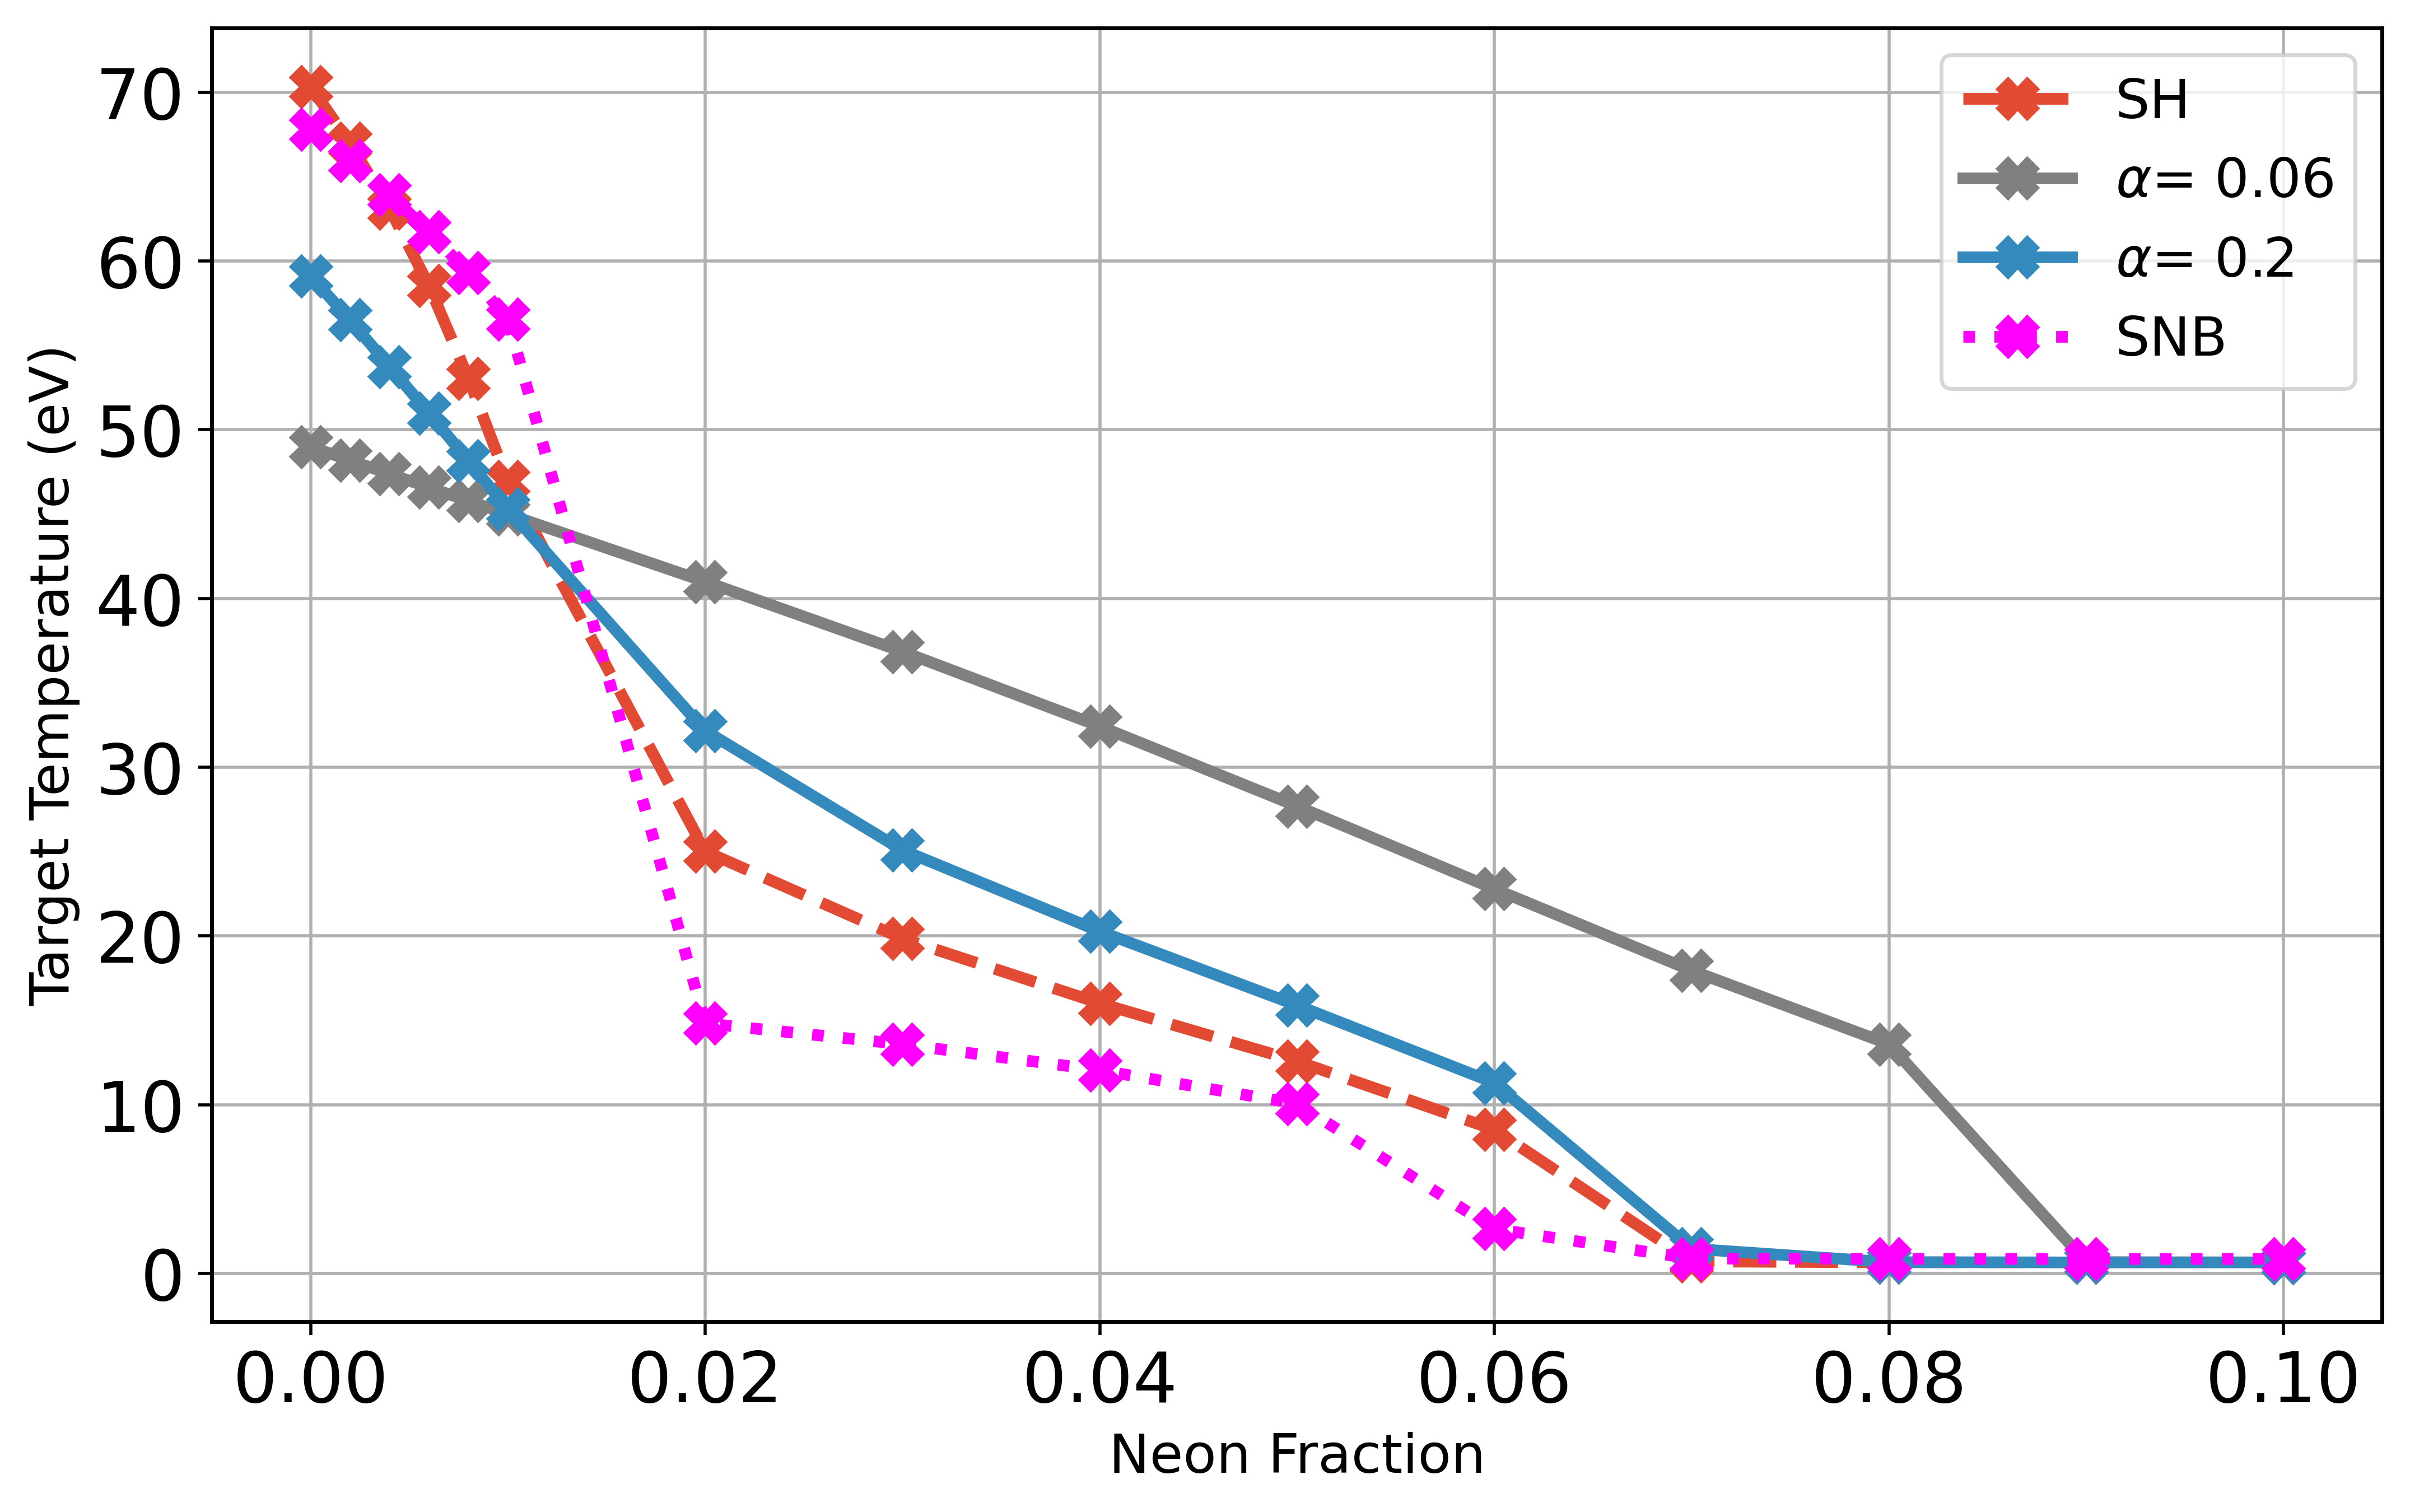

In [7]:
# plt.style.use('ggplot')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams.update({'font.size': 14})
markersize = 10

fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi = 500)

# print(ds['alpha'].unique())

for i in ds['alpha'].unique():
    if i not in ['0.1','0.4']:  # Exclude plotting for alpha = 'SNB'
        target_temp_list = []
        target_pcle_flux_list = []
        neon_frac_list = []
        df_alpha = ds[ds['alpha'] == f'{i}']
        if i == 'SH':
            linestyle = '--'
            label = 'SH'
        elif i == 'SNB':
            linestyle = ':'
            label = 'SNB'
        else:
            linestyle = '-'
            label = r'$\alpha$' + f'= {i}'
        for j in df_alpha['neon_frac'].unique():
            # print(df_alpha['neon_frac'].unique())
            if j < 0.11:

                try:
                    target_pcle_flux = (df_alpha[(df_alpha['alpha'] == i) & (df_alpha['neon_frac'] == j)]['Vd+'].values[-1] *
                                        df_alpha[(df_alpha['alpha'] == i) & (df_alpha['neon_frac'] == j)]['Nd+'].values[-1])
                    target_pcle_flux_list.append(target_pcle_flux)

                    target_temp_list.append(ds[(ds['alpha'] == i) & (ds['neon_frac'] == j)]['target_temp'].values[-1])
                except:
                    continue
                neon_frac_list.append(j)
        # print(i, target_temp_list)
        # print(neon_frac_list)


        ax.plot(neon_frac_list, target_temp_list, linewidth=linewidth, markersize=markersize,marker='X', label=label, color = colors[i], linestyle = linestyle)

ax.set_xlabel('Neon Fraction')
ax.set_ylabel('Target Temperature (eV)')

# Set the outline color to black
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')


plt.legend()

# RADAS neon curve

88
44.04404404404405


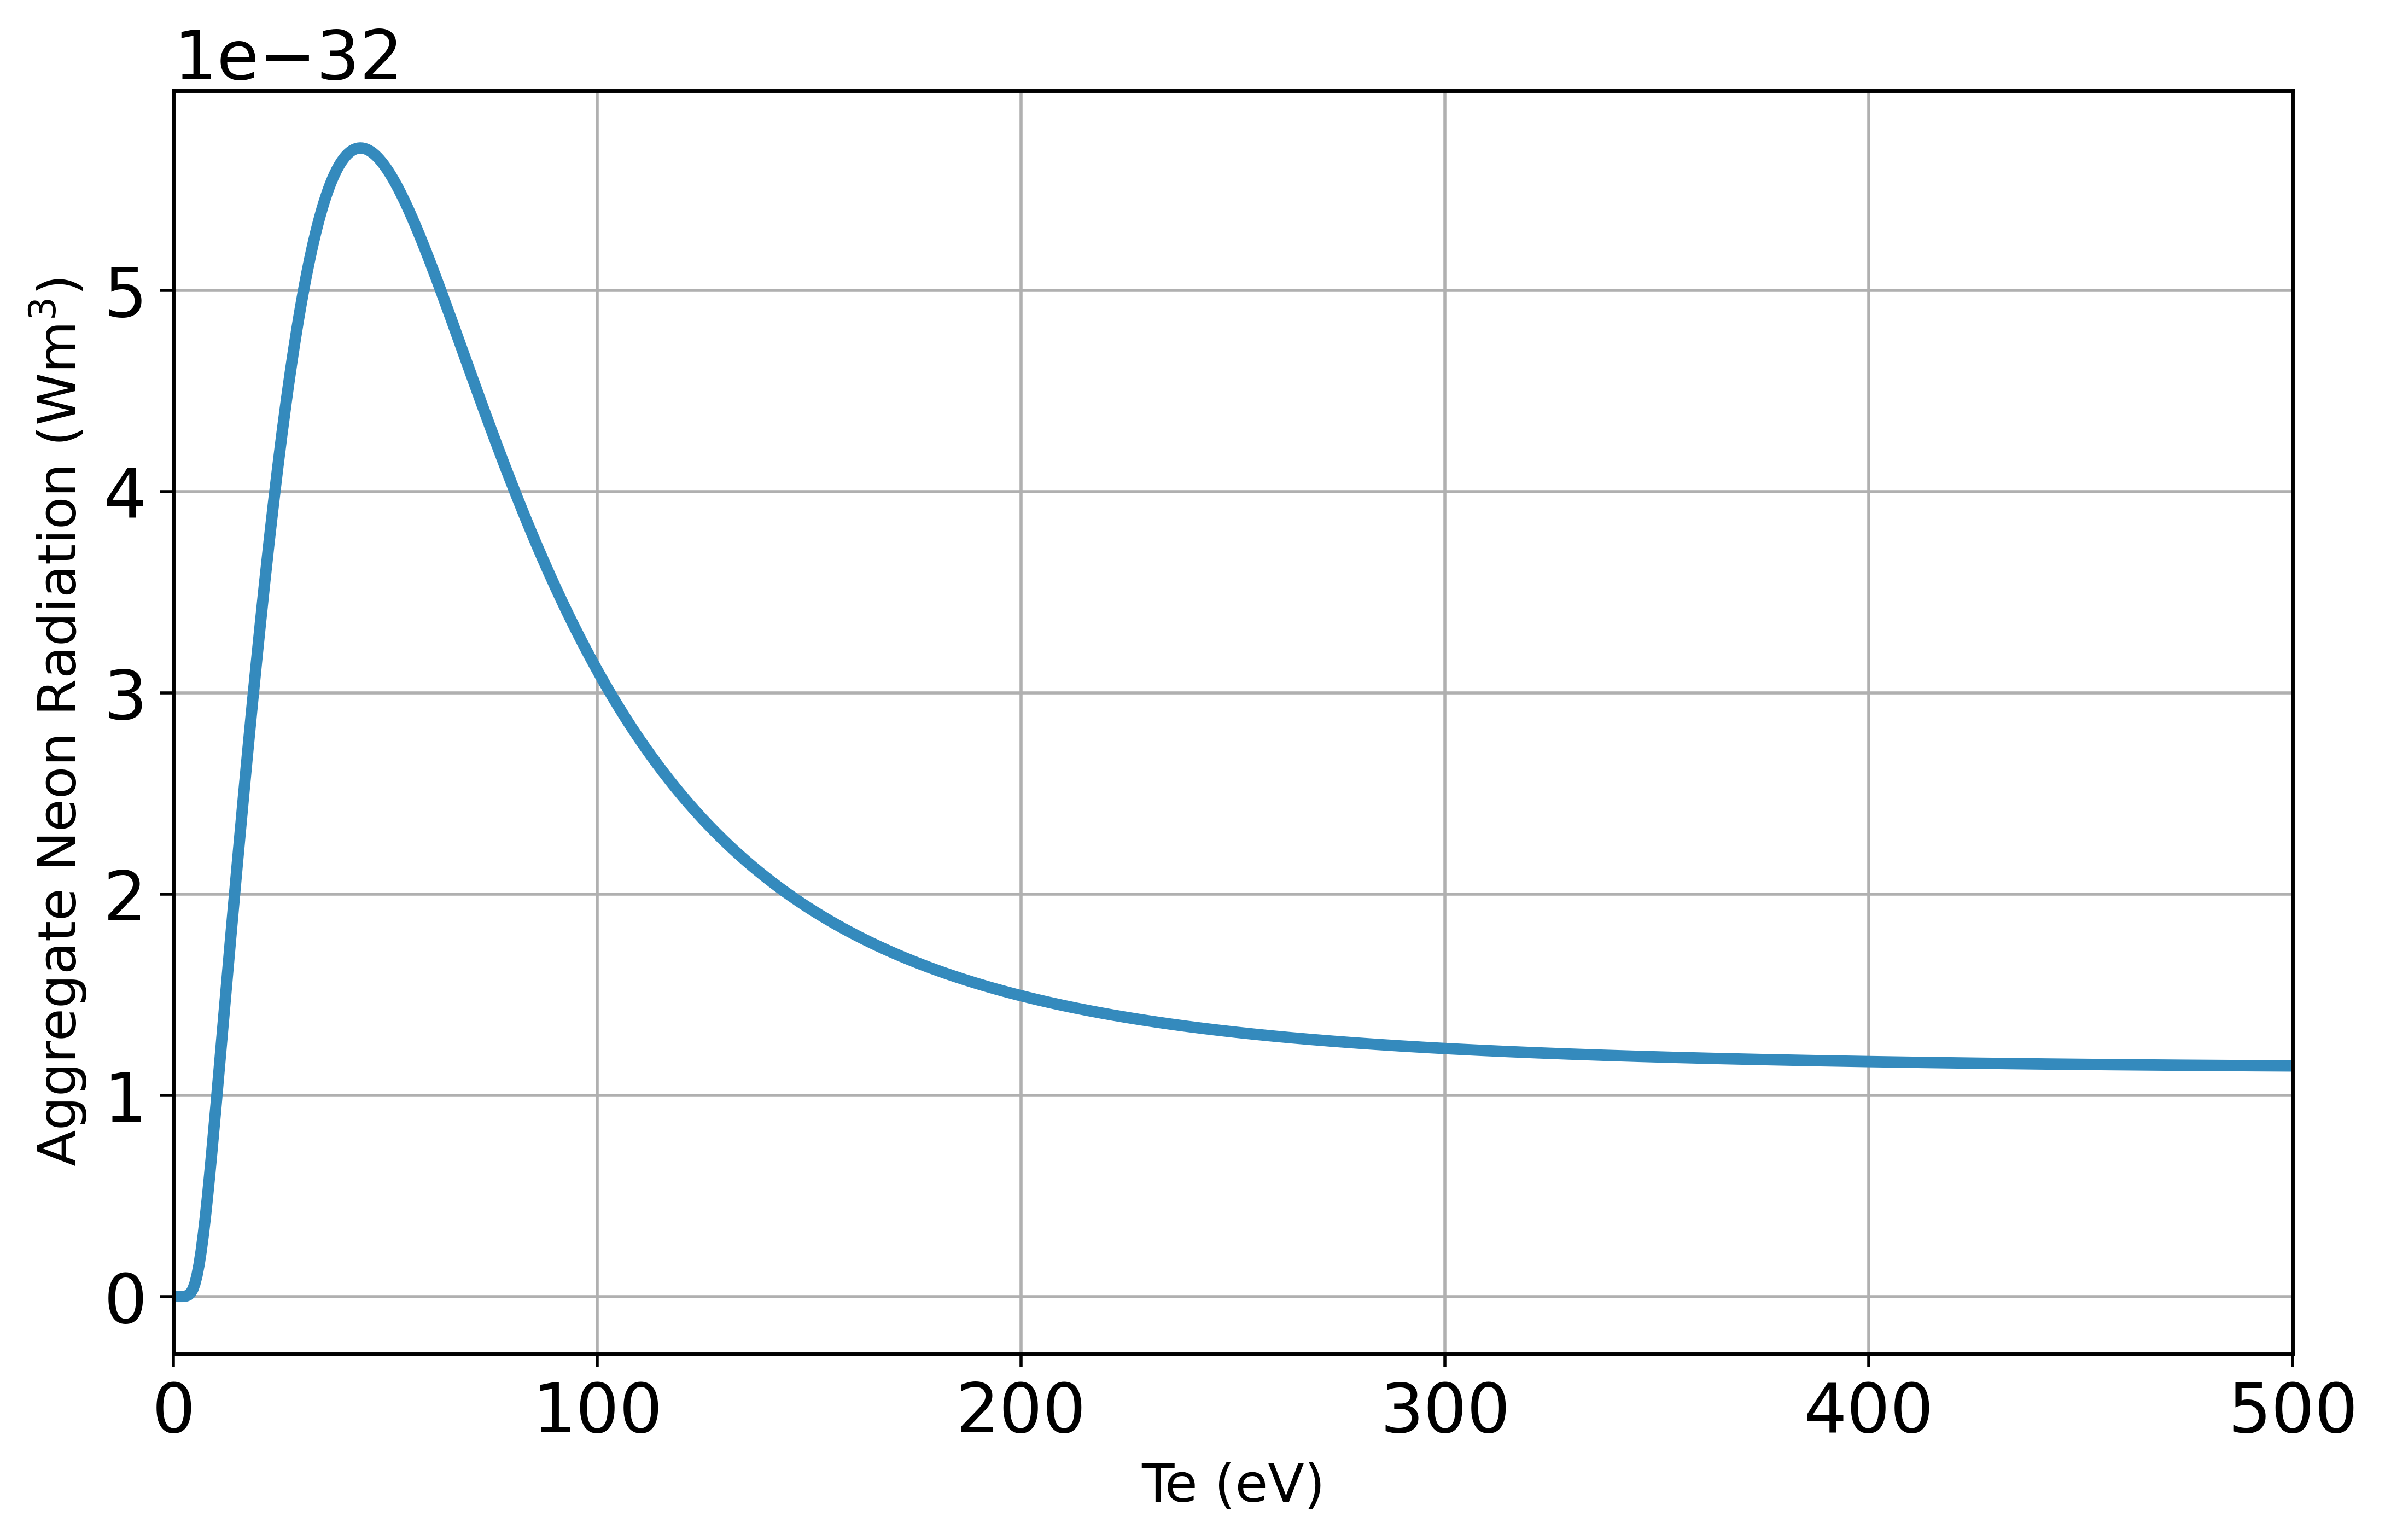

In [8]:
import numpy as np

def neon_adas_curve(Te):
    logT = np.log(Te)
    log_out = np.zeros_like(Te)

    # Coefficients for the polynomial part
    coefficients = np.array([
        -8.21475117e+01, 1.28929854e+01, -4.74266289e+01,
         7.45222324e+01, -5.75710722e+01, 2.57375965e+01,
        -7.12758563e+00, 1.24287546e+00, -1.32943407e-01,
         7.97368445e-03, -2.05487897e-04
    ])

    # Valid temperature range for the polynomial
    valid_mask = (Te >= 2) & (Te <= 1000)
    below_mask = Te < 2
    above_mask = Te > 1000

    # Apply the polynomial coefficients
    for i, coeff in enumerate(coefficients):
        log_out[valid_mask] += coeff * logT[valid_mask] ** i
    
    # Apply the exponential to the valid range
    log_out[valid_mask] = np.exp(log_out[valid_mask])
    
    # Assign the constant values outside the valid temperature range
    log_out[below_mask] = 6.35304113e-36
    log_out[above_mask] = 1.17894628e-32

    return log_out

# Example usage with an array of temperatures:
Te_array = np.array([1.0, 5.0, 10.0, 100.0, 500.0, 1500.0])
output_values = neon_adas_curve(Te_array)
# print(output_values)


# Use this updated Neon_adas class to create the color map and overlay it onto the plot

Te = np.linspace(0, 500, 1000)  # Example temperature value
result = neon_adas_curve(Te)

fig,axis = plt.subplots(1, 1, figsize=(10, 6), dpi = 500)

max_index = np.argmax(result)
print(max_index)

print(Te[max_index])

axis.plot(Te, result, label='Neon ADAS Curve', linewidth=linewidth, color = '#348ABD')
axis.set_xlabel('Te (eV)')
axis.set_ylabel(r'Aggregate Neon Radiation (Wm$^{3}$)')
axis.set_xbound(0, 500)
# axis.set_yscale('log')
# axis.set_xbound(0,200)

# cmap overlay

SH
0.06
0.2
SNB


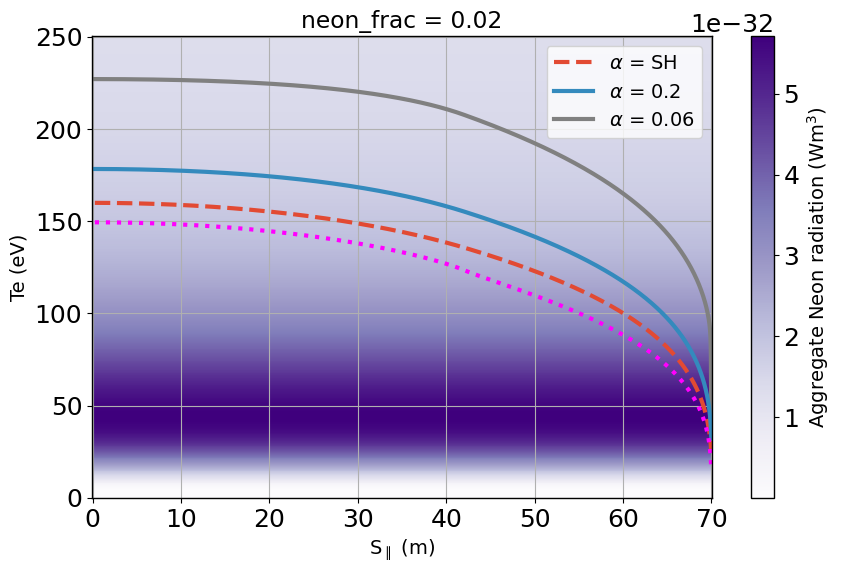

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Assuming the Neon_adas class is defined as in the previous discussion


# Sample data from the plot
# Replace these with the actual data


# Plot the colormap
fig,ax = plt.subplots(nrows=1,ncols=1, figsize=(10, 6))


# Overlay the original line data
# Replace 'alpha_line_data' and 'sh_line_data' with your actual line data
# For example:

for i in ds['alpha'].unique():
    if i == 'SH':
        linestyle = '--'
    elif i == 'SNB':
        linestyle = ':'
    else:
        linestyle = '-'
    for j in ds['neon_frac'].unique():
        if i not in ['0.1', '0.4']:  # Exclude alpha values of 0.1 and 0.4
            if j == 0.02:
                neon_frac = j
                print(i)
                ax.plot(ds[(ds['alpha'] == i) & (ds['neon_frac'] == j)]['y'], ds[(ds['alpha'] == i) & (ds['neon_frac'] == j)]['Te'], 
                        label=r'$\alpha$' + f' = {i}', color=colors[i], linewidth=3, markersize=15, linestyle = linestyle)



S_II = np.linspace(0, 70, 500)  # Spatial coordinate
T_e = np.linspace(0, 250, 500)  # Electron temperature

# Create a meshgrid for S_II and T_e
S_II_grid, T_e_grid = np.meshgrid(S_II, T_e)

# Evaluate the curve function on the meshgrid
Z = neon_adas_curve(T_e_grid)

cmap = 'Purples'

norm = Normalize(vmin=np.min(Z), vmax=np.max(Z))
ax.pcolormesh(S_II_grid, T_e_grid, Z, shading='auto', norm=norm, cmap=cmap)
fig.colorbar(label=r'Aggregate Neon radiation (Wm$^{3}$)', mappable=ax.collections[0])


S_II = np.linspace(64, 70, 500)  # Spatial coordinate
T_e = np.linspace(0, 250, 500)  # Electron temperature



# Create a meshgrid for S_II and T_e
S_II_grid, T_e_grid = np.meshgrid(S_II, T_e)
Z = neon_adas_curve(T_e_grid)

norm = Normalize(vmin=np.min(Z), vmax=np.max(Z))
# colorbar.set_cmap('plasma')


# Get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Desired order (SH, 0.2, 0.06)
order = [0, 2, 1]

# Reorder handles and labels
handles = [handles[i] for i in order]
labels = [labels[i] for i in order]



# Set labels and title as needed
ax.set_xlabel(r'S$_\parallel$ (m)')
ax.set_ylabel(r'Te (eV)')
ax.set_title(F'neon_frac = {neon_frac}')
ax.legend(handles, labels, loc = 'upper right')
plt.show()
